# 1. Problem statement and EDA

### 1. Problem Statment



1. Build model to predict the price of old cars in order to grow in the the market.
2. The pricing model should consider different factors like brand, transmision, kilo meter run, New_price for the same brand, location of selling car.
3. Based on the model, make some recommendation which can further help Car4U to build profitable strategies.

### 2. Loading Data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns   # Why sns?  It's a reference to The West Wing
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
# seting data frame display option
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',200)

In [3]:
#loading dataset
df = pd.read_csv('used_cars_data.csv')
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN


#### Insights


 

1. We can  see that there are some columns that are represented as strings but that we really will want to be numeric. This includes columns like Mileage, Engine, Power, New_Price. 
2. Mileage column needs to be turned from kmpl into just a number. It also has different unit kmpl and km/kg. So it requires unit conversion.
3. Engine column needs to be turned from CC into just a number.
4. Power column needs to be turned from bhp into just a number.
5. New_Price column needs to be turned into just a number. It also has different units : Lakhs % Cr so it requires unit conversion.
6. This preview also shows that some columns potentially have a lot of missingness so we'll want to make sure to look into that later. New_price and price in particular have lots of missing values.


### 3. Exploratory Data Analysis 

### 3.a  Explore shape and datatype

In [4]:

print(f'There are {df.shape[0]} rows and {df.shape[1]} columns.')  # f-string


There are 7253 rows and 14 columns.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


#### Insights
1. Columns Mileage, Engine, Power, Seats, New_Price, Price have missing values. 
2. Columns Mileage, Engine, Power and New_Price  should be numeric type and needs to be converted into numberic type.

### 3.b Processing columns and unit conversion

#### Mileage

For this, we have column that is string containing values with suffix kmpl and km/kg and np.nan. We will process this column to convert  all values to kmpl and turn into numeric for the non-missing values, while the np.nans will stay as such.
1 KG of oil is equal to 1.1 Litre.

In [6]:
df['Mileage'].head()

0    26.6 km/kg
1    19.67 kmpl
2     18.2 kmpl
3    20.77 kmpl
4     15.2 kmpl
Name: Mileage, dtype: object

In [7]:
def mileage_to_num(mileage_val):
    """This function takes in a string representing a mileage in km/kg or kmpl, change all of the values to kmpl 
    and converts it to a number. For example, '26.6 km/kg' becomes 26.6/1.1 = 24.18.
    If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan."""
    if isinstance(mileage_val, str):  # checks if `mileage_val` is a string
        
        divider = 1  # handles K vs M salaries
        unit = mileage_val.split(" ")[1]
        if unit == 'km/kg':
            divider = 1.1
        return float(mileage_val.replace(' km/kg', '').replace(' kmpl', '')) / divider
    else:  # this happens when the current mileage is np.nan
        return np.nan

    
df['Mileage'] = df['Mileage'].apply(mileage_to_num)
    
df['Mileage'].head()  # good to go!

0    24.181818
1    19.670000
2    18.200000
3    20.770000
4    15.200000
Name: Mileage, dtype: float64

#### Engine

For this, we have column that is string containing values with suffix CC and np.nan. We will process this column to turn into numeric for the non-missing values, while the np.nans will stay as such.

In [8]:
df['Engine'].unique()

array(['998 CC', '1582 CC', '1199 CC', '1248 CC', '1968 CC', '814 CC',
       '1461 CC', '2755 CC', '1598 CC', '1462 CC', '1497 CC', '2179 CC',
       '2477 CC', '1498 CC', '2143 CC', '1995 CC', '1984 CC', '1197 CC',
       '2494 CC', '1798 CC', '2696 CC', '2698 CC', '1061 CC', '1198 CC',
       '2987 CC', '796 CC', '624 CC', '1999 CC', '1991 CC', '2694 CC',
       '1120 CC', '2498 CC', '799 CC', '2393 CC', '1399 CC', '1796 CC',
       '2148 CC', '1396 CC', '1950 CC', '4806 CC', '1998 CC', '1086 CC',
       '1193 CC', '2982 CC', '1493 CC', '2967 CC', '2993 CC', '1196 CC',
       '1799 CC', '2497 CC', '2354 CC', '1373 CC', '2996 CC', '1591 CC',
       '2894 CC', '5461 CC', '1595 CC', '936 CC', '1997 CC', nan,
       '1896 CC', '1390 CC', '1364 CC', '2199 CC', '993 CC', '999 CC',
       '1405 CC', '2956 CC', '1794 CC', '995 CC', '2496 CC', '1599 CC',
       '2400 CC', '1495 CC', '2523 CC', '793 CC', '4134 CC', '1596 CC',
       '1395 CC', '2953 CC', '1586 CC', '2362 CC', '1496 CC', '1368

In [9]:
def engine_to_num(engine_val):
    """This function takes in a string representing a The displacement volume of the engine in CC, change all of the values to remove CC 
    and converts it to a number. If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan."""
    if isinstance(engine_val, str):  # checks if `engine_val` is a string
        
        return float(engine_val.split(" ")[0])
    else:  # this happens when the current engine is np.nan
        return np.nan

    
df['Engine'] = df['Engine'].apply(engine_to_num)
    
df['Engine'].head()  # good to go!

0     998.0
1    1582.0
2    1199.0
3    1248.0
4    1968.0
Name: Engine, dtype: float64

#### Power

Column Power either having values with suffix bhp or Nan. We need to convert this column to remove bhp and turn into numeric. The maximum power of the engine is in bhp.

In [10]:
df['Power'].value_counts()

74 bhp        280
98.6 bhp      166
73.9 bhp      152
140 bhp       142
null bhp      129
             ... 
80.9 bhp        1
174.57 bhp      1
35.5 bhp        1
402 bhp         1
116.9 bhp       1
Name: Power, Length: 386, dtype: int64

In [11]:
def power_to_num(power_val):
    """This function takes in a string representing amaximum power of the engine in bhp, change all of the values to remove bhp 
    and converts it to a number. If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan."""
    if isinstance(power_val, str):  # checks if `power_val` is a string
        
        return power_val.split(" ")[0]
    else:  # this happens when the current power is np.nan
        return np.nan

    
df['Power'] = (df['Power'].apply(power_to_num))
    
df['Power'].value_counts()  # good to go!

74        280
98.6      166
73.9      152
140       142
null      129
         ... 
161         1
68.1        1
174.57      1
120.69      1
252         1
Name: Power, Length: 386, dtype: int64

This column still have `null` values which we need to treat and replace null with nan so that we can convert this column into numeric column. 

In [12]:
#as column still have null and can not be converted to number, so replacing null with np.nan
df['Power']=df['Power'].replace(to_replace="null",value=np.nan)


In [13]:

df['Power'].value_counts()

74        280
98.6      166
73.9      152
140       142
78.9      128
         ... 
41          1
170.30      1
120.69      1
181.04      1
252         1
Name: Power, Length: 385, dtype: int64

In [14]:
#convert column type to float
df['Power']=df['Power'].astype(float,)

In [15]:
df['Power'].dtypes

dtype('float64')

#### New_price

Column `New_Price` either having values with suffix Lakh and Cr or Nan. We need to first do unit conversion to convert Cr to Lakh and then convert this column to remove Lakh and turn into numeric. 1 Cr is equal to 100 Lakh.

In [16]:
df['New_Price'].unique()

array([nan, '8.61 Lakh', '21 Lakh', '10.65 Lakh', '32.01 Lakh',
       '47.87 Lakh', '10.57 Lakh', '12.33 Lakh', '11.12 Lakh',
       '23.64 Lakh', '18.64 Lakh', '19.34 Lakh', '49.14 Lakh',
       '11.81 Lakh', '16.65 Lakh', '6.67 Lakh', '6.45 Lakh', '6.41 Lakh',
       '27 Lakh', '5.13 Lakh', '54.43 Lakh', '9.51 Lakh', '9.96 Lakh',
       '14.44 Lakh', '4.53 Lakh', '95.04 Lakh', '13.49 Lakh', '1.28 Cr',
       '60.88 Lakh', '7.39 Lakh', '69.47 Lakh', '8.78 Lakh', '12.74 Lakh',
       '10.52 Lakh', '11.98 Lakh', '8.54 Lakh', '33.58 Lakh', '9.12 Lakh',
       '5.29 Lakh', '44.28 Lakh', '20.74 Lakh', '11.74 Lakh',
       '25.52 Lakh', '14.07 Lakh', '95.13 Lakh', '8.34 Lakh', '8.85 Lakh',
       '25.4 Lakh', '16.67 Lakh', '79.43 Lakh', '6.62 Lakh', '1.04 Cr',
       '58.67 Lakh', '28.37 Lakh', '4.48 Lakh', '72.64 Lakh',
       '36.15 Lakh', '44.59 Lakh', '12 Lakh', '14.65 Lakh', '53.72 Lakh',
       '33.91 Lakh', '12.51 Lakh', '9.74 Lakh', '95.38 Lakh',
       '60.59 Lakh', '11.28 Lakh', 

In [17]:
def newPrice_to_num(newPrice_val):
    """This function takes in a string representing new car price in Lakh, change all of the values to remove Lakh 
    and converts it to a number. If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan."""
    if isinstance(newPrice_val, str):  # checks if `newPrice_val` is a string
        multiplier = 1  # handles Cr vs Lakhs in Lakhs
        unit = newPrice_val.split(" ")[1]
        if unit == 'Cr':
            multiplier = 100
        
        return float(newPrice_val.replace(' Cr', '').replace(' Lakh', ''))*multiplier
    else:  # this happens when the current income is np.nan
        return np.nan

    
df['New_Price'] = df['New_Price'].apply(newPrice_to_num)
    
df['New_Price'].dtypes  # good to go!

dtype('float64')

In [18]:

df['New_Price'].value_counts()

95.13     6
4.78      6
63.71     6
33.36     6
11.75     5
         ..
53.68     1
13.08     1
9.27      1
13.76     1
100.00    1
Name: New_Price, Length: 625, dtype: int64

In [19]:
#verifying column type for df dataset
df.dtypes

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_Price            float64
Price                float64
dtype: object

#### Insights:

After this column processing and unit conversion, data type of columns are correct.

### 3.c Basic summary statistics and consequences

#### Central Tendency of data

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S.No.,7253.0,3626.000000,2093.905084,0.00,1813.000,3626.00,5439.0000,7.252000e+03
Year,7253.0,2013.365366,3.254421,1996.00,2011.000,2014.00,2016.0000,2.019000e+03
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.000,53416.00,73000.0000,6.500000e+06
Mileage,7251.0,18.118988,4.528462,0.00,15.170,18.16,21.1000,3.049091e+01
Engine,7207.0,1616.573470,595.285137,72.00,1198.000,1493.00,1968.0000,5.998000e+03
Power,7078.0,112.765214,53.493553,34.20,75.000,94.00,138.1000,6.160000e+02
Seats,7200.0,5.279722,0.811660,0.00,5.000,5.00,5.0000,1.000000e+01
New_Price,1006.0,22.779692,27.759344,3.91,7.885,11.57,26.0425,3.750000e+02
Price,6019.0,9.479468,11.187917,0.44,3.500,5.64,9.9500,1.600000e+02


#### skewness

In [21]:
#skewness
df.skew()

S.No.                 0.000000
Year                 -0.839816
Kilometers_Driven    61.582575
Mileage              -0.491162
Engine                1.412413
Power                 1.961178
Seats                 1.902262
New_Price             4.128300
Price                 3.335232
dtype: float64

#### Insights 

Range and distribution of numeric variables: 
1. `Year` has value from 1996 to 2016.
2. Car `seats` rang is 0-10 seats.
3. `Price` has range from -44 - 160 lakhs.
4. `Mileage` has range 0-30.4 kmpl.
5. `Kilometer_Driven` has range 171.00 to 6500000 which is really big range and may have multiple outliers.

Missing values and skewness of data:

1. Missing value: Except Mileage, Engine, Power, Seats, New_Price and Price column have missing values.
2. Year and Mileage are negatively skewed.
3. kilometers_driven, engine,power,seats,new_price, price are positively skewed.
4. Kilometers_driven, engine, power,new_prices, price column have potential outliers.
5. There is no skewness and missing value in S.No as it's id column and can be drop before creating model.

#### Checking missing values

In [22]:
#looking at which column has maximum missing values

df.isnull().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Power                 175
Seats                  53
Engine                 46
Mileage                 2
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
S.No.                   0
dtype: int64

`New_price` has maximum values.

#### Checking Categories for non- numeric values

In [23]:
# looking at value counts for non-numeric features
num_to_display = 10 

for colname in df.dtypes[df.dtypes == 'object'].index:
    val_counts = df[colname].value_counts(dropna=False)
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f'Only displaying first {num_to_display} of {len(val_counts)} values.')
    print('\n\n')

Mahindra XUV500 W8 2WD        55
Maruti Swift VDI              49
Maruti Swift Dzire VDI        42
Honda City 1.5 S MT           39
Maruti Swift VDI BSIV         37
Maruti Ritz VDi               35
Toyota Fortuner 3.0 Diesel    35
Honda City 1.5 V MT           32
Honda Amaze S i-Dtech         32
Honda Brio S MT               32
Name: Name, dtype: int64
Only displaying first 10 of 2041 values.



Mumbai        949
Hyderabad     876
Kochi         772
Coimbatore    772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Name: Location, dtype: int64
Only displaying first 10 of 11 values.



Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64



Manual       5204
Automatic    2049
Name: Transmission, dtype: int64



First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64





#### Insights

1. Sold car names have almost 2041 names.
2. There are only 11 diffrent location where old cars are sold.
3. There are 5 different types of Fuel_Type.
4. 2 type of transmission and 4 type of owner.
5. categorial variables's values are looking good and does not require any processging except car names can be splited into model and brand in later steps.

### 3.d Feature Engineering
Splitting car name in 2 different columns brand and model.

In [24]:
df['Brand']=df["Name"].apply(lambda x: x.split(" ")[0])
df['Brand'].value_counts()

Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land               67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini               31
Volvo              28
Jeep               19
Porsche            19
Datsun             17
Force               3
ISUZU               3
Bentley             2
Isuzu               2
Hindustan           1
Smart               1
Lamborghini         1
OpelCorsa           1
Ambassador          1
Name: Brand, dtype: int64

In [25]:
def process_carModel(name_value):
     space = " "
     name_subString = name_value.split(" ")[1:]
     return space.join(name_subString)  
        

df['Model'] = df['Name'].apply(process_carModel)  
df['Model'].value_counts()

XUV500 W8 2WD                  55
Swift VDI                      49
Swift Dzire VDI                42
City 1.5 S MT                  39
Swift VDI BSIV                 37
                               ..
Ignis 1.2 AMT Delta             1
Scorpio S10 8 Seater            1
370Z AT                         1
Punto 1.2 Dynamic               1
Rapid 1.6 MPI Ambition Plus     1
Name: Model, Length: 2041, dtype: int64

In [26]:
brands = df['Brand'].nunique()
models = df['Model'].nunique()
print(f'There are {brands} Brands and {models} car Models.')  # f-string


There are 33 Brands and 2041 car Models.


In [27]:
df.drop(['Name'],axis=1,inplace=True)

In [28]:
df.head()

,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand,Model
0,0,Mumbai,2010,72000,CNG,Manual,First,24.181818,998.0,58.16,5.0,NaN,1.75,Maruti,Wagon R LXI CNG
1,1,Pune,2015,41000,Diesel,Manual,First,19.670000,1582.0,126.20,5.0,NaN,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,2,Chennai,2011,46000,Petrol,Manual,First,18.200000,1199.0,88.70,5.0,8.61,4.50,Honda,Jazz V
3,3,Chennai,2012,87000,Diesel,Manual,First,20.770000,1248.0,88.76,7.0,NaN,6.00,Maruti,Ertiga VDI
4,4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.200000,1968.0,140.80,5.0,NaN,17.74,Audi,A4 New 2.0 TDI Multitronic


### 3.e Univariate and Bivariate Analysis


### Distplot

In [29]:
colNumeric = ['Year','Kilometers_Driven','Mileage','Engine','Power','New_Price','Price']


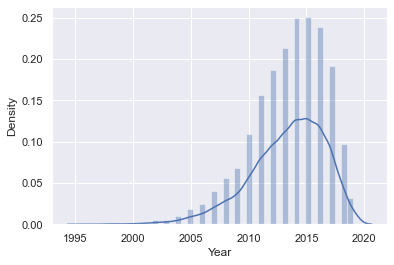

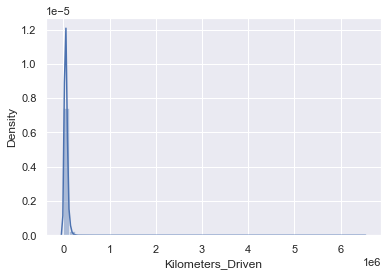

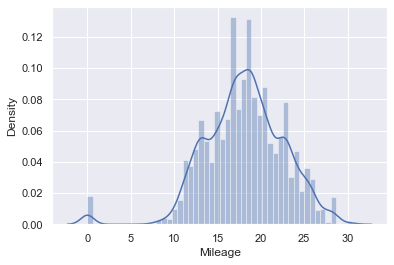

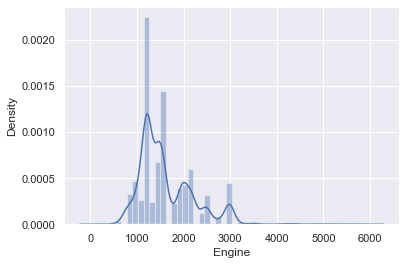

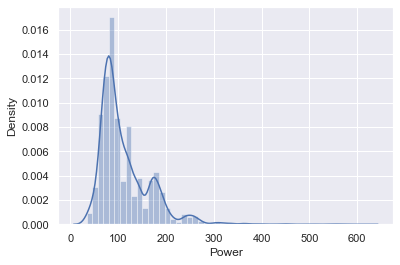

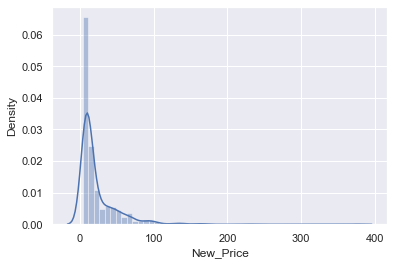

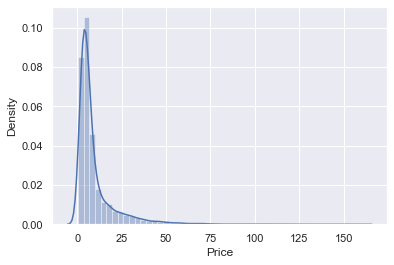

In [30]:

for col in colNumeric:
    sns.distplot(df[col],kde=True)
    plt.show();

#### Insights:
Data distribution:
1. Year: most of car's manufacture year is between 2012-2017.
2. Kilometer driven is very skewed and needs to be transformed. 
3. Mileage of cars lies between 7.5 to 30 is high and mileage around 20 is most occured.
4. Most car sold had engine with displacement volumn between 1000 -2000 range. There are also sold cars having displacement volumn between 2000-3500 and less than 1000.
5. Max density  is for car having maximum power of engine around 90.
6. max density of New_Price is around 10 Lakhs.
7. power, engine, mileage columns also have mulitple curve showing present of outliers and require some transformation.

#### Insights about transformation of different variable:
1. kilometer_driver and price are very skewed and will likely behave better on the log scale.


#### Boxplot

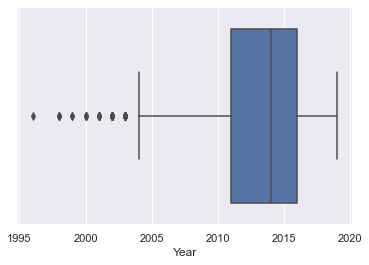

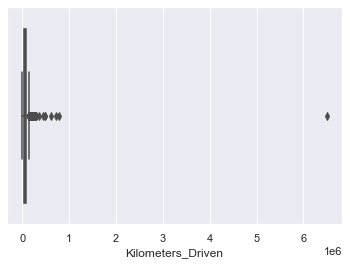

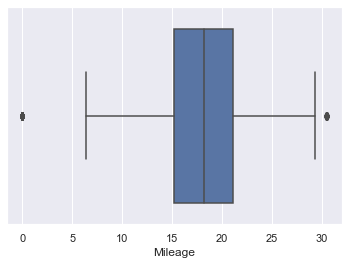

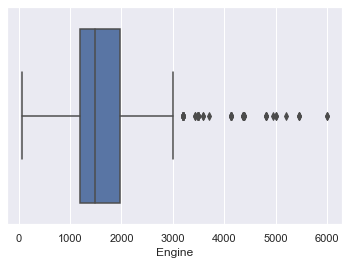

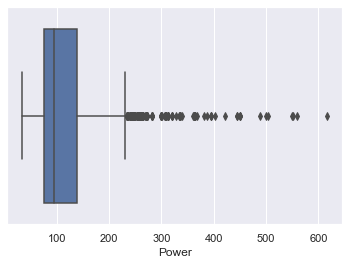

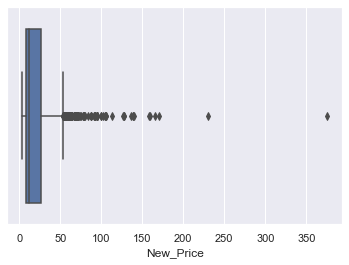

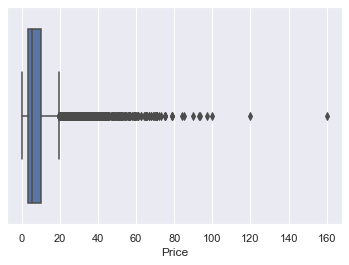

In [31]:
for col in colNumeric:
    sns.boxplot(data=df, x=col)
    plt.show();

#### Insights
1. Kilometer_Driver has very skewed plot and need transformation. Kilometers_Driven has one extreme value of 6500000 km.
2. Mileage has a 0 value which seems not possible so we can treat it as missing value.
2. Price and New_Price have too many outliers and needs to be handled carefully.
3. Price has extreme outlier atvalue 160.
4. Engine, Mileage and year have few outlier and can be handled.

#### Count plot for categorical variables

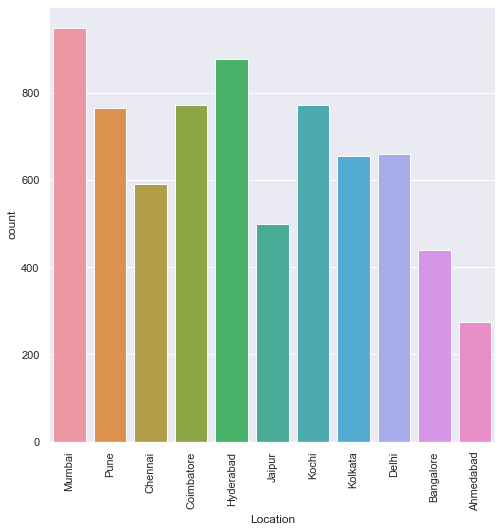

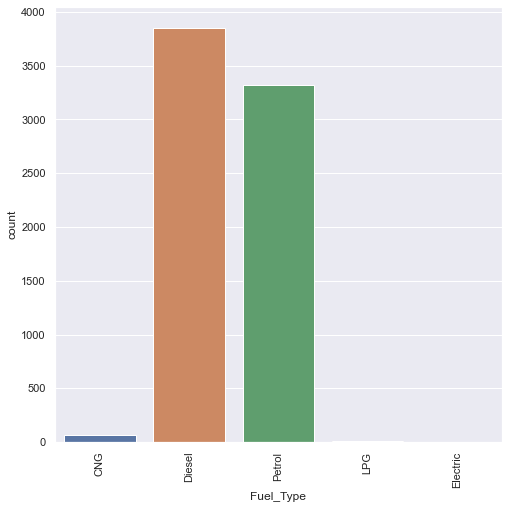

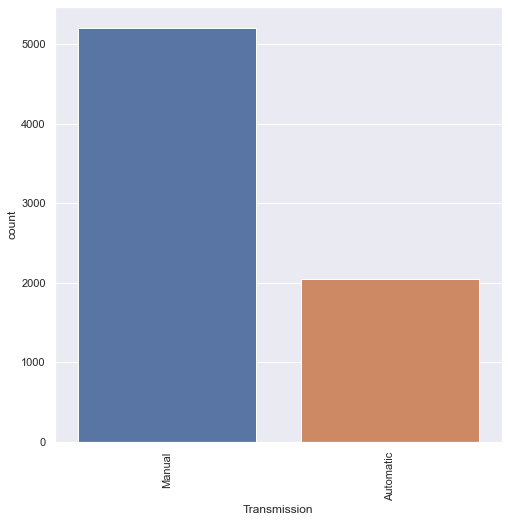

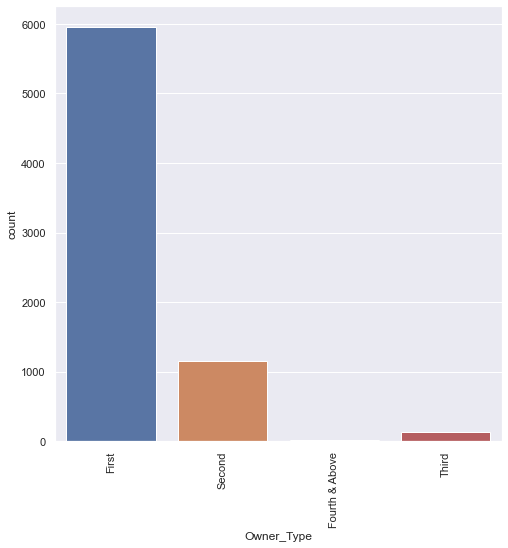

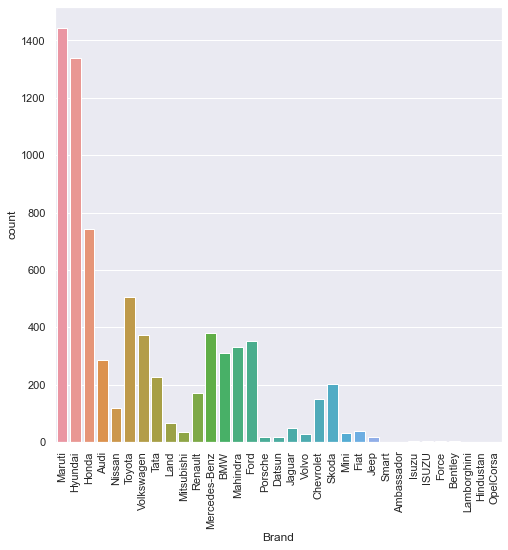

In [32]:
CatColumn = ['Location','Fuel_Type','Transmission','Owner_Type','Brand']
for col in CatColumn:
    plt.figure(figsize=(8,8))
    sns.countplot(data=df, x=col)
    plt.xticks(rotation=90)
    plt.show();

#### Insights
1. Maximum cars are sold at Mumbai.
2. Demand of diesel type car is highest and second hightes is Petrol type car.
3. Demand of  manual car is higher than Automatic.
4. First owner cars are most popular in old car market. 
5. count of sold car is highest for Maruti Brand and second highest is for Hyndai.So we can say Maruti and Hyundia are most popular in old car market.
6. Model has too many values to show in graphs.

#### Analysis and preprocessing with model column

In [33]:
###As model have a long ist to plot on graphs so retriving top 20 models.
model_count = df.groupby(by='Model')['S.No.'].agg(['count']).reset_index().sort_values(by='count', ascending=False)
model_top20 = model_count.head(40)
model_top20

,Model,count
1878,XUV500 W8 2WD,55
1612,Swift VDI,49
1588,Swift Dzire VDI,42
385,City 1.5 S MT,39
1613,Swift VDI BSIV,37
794,Fortuner 3.0 Diesel,35
1348,Ritz VDi,35
284,Brio S MT,32
389,City 1.5 V MT,32
181,Amaze S i-Dtech,32


In [34]:
##unique model count
model_count.shape[0]

2041

In [35]:
###Bottom 10 model
modelBottom5 = model_count.tail(10)
modelBottom5

,Model,count
1358,Rover Discovery 4 TDV6 Auto Diesel,1
1359,Rover Discovery 4 TDV6 SE,1
1360,Rover Discovery HSE Luxury 3.0 TD6,1
1361,Rover Discovery SE 3.0 TD6,1
1362,Rover Discovery Sport SD4 HSE Luxury,1
698,Etios GD SP,1
695,Etios G SP,1
692,Etios Cross 1.4L GD,1
1368,Rover Freelander 2 HSE SD4,1
1020,KUV 100 mFALCON D75 K4 Plus,1


#### Insights:
1. Model "XUV500 W8 2WD" is most popular in the old car market.
2. Total count of different models is 2041.
3. there are 12 models which have more than 30 records of sold cars.

#### Grouping model based on number of count and dropping model column

In [36]:
#count of model with sinlge recrds
model_count[model_count['count'] == 1].count()

Model    862
count    862
dtype: int64

In [37]:
#model list with 1 record
model_1 = model_count[model_count['count'] == 1]
model_1['Model_count'] = 'model_1'

In [38]:
df1 = pd.merge(left=model_1,right=df,on='Model', how= 'inner')
df1.shape

(862, 17)

In [39]:
#model list with 1-5 records

model_5= model_count[model_count['count'] <= 5 ]
model_1_5 =  model_count[(model_count['count']<=5) &(model_count['count'] >1)]
model_1_5['Model_count'] = 'model_1_5'


In [40]:
df2 = pd.merge(left=model_1_5,right=df,on='Model', how= 'inner')
df2.shape

(2431, 17)

In [41]:
df12 = pd.concat([df1,df2] )

In [42]:
#data frame with model1 and model1-5
df12.shape

(3293, 17)

In [43]:
#model list with 6-10 records
model_6_10 =  model_count[(model_count['count']<=10) &(model_count['count'] >5)]
model_6_10['Model_count'] = 'model_6_10'
model_6_10.count()

Model          198
count          198
Model_count    198
dtype: int64

In [44]:
df1 = pd.merge(left=model_6_10,right=df,on='Model', how= 'inner')
df1.shape

(1488, 17)

In [45]:
#data frame with model_6_10 and df12
df2 = pd.concat([df12,df1] )
df2.shape

(4781, 17)

In [46]:
#model list with 11-20 records
model_11_20 =  model_count[(model_count['count']<=20) &(model_count['count'] >10)]
model_11_20['Model_count'] = 'model_11_20'
model_11_20.count()

Model          108
count          108
Model_count    108
dtype: int64

In [47]:
df1 = pd.merge(left=model_11_20,right=df,on='Model', how= 'inner')
df1.shape

(1566, 17)

In [48]:
#data frame with model_11_20 and df2
df12 = pd.concat([df1,df2] )
df12.shape

(6347, 17)

In [49]:
#model list with 21-30 records
model_21_30 =  model_count[(model_count['count']<=30) &(model_count['count'] >20)]
model_21_30['Model_count'] = 'model_21_30'
model_21_30.count()

Model          19
count          19
Model_count    19
dtype: int64

In [50]:
df1 = pd.merge(left=model_21_30,right=df,on='Model', how= 'inner')
df1.shape

(455, 17)

In [51]:
#data frame with model_21_30 and df1
df2 = pd.concat([df1,df12] )
df2.shape

(6802, 17)

In [52]:
#model list with 31-40 records
model_31_40 =  model_count[(model_count['count']<=40) &(model_count['count'] >30)]
model_31_40['Model_count'] = 'model_31_40'

model_31_40.count()

Model          9
count          9
Model_count    9
dtype: int64

In [53]:
df1 = pd.merge(left=model_31_40,right=df,on='Model', how= 'inner')
df1.shape

(305, 17)

In [54]:
#data frame with model_31_40 and df1
df12 = pd.concat([df1,df2] )
df12.shape

(7107, 17)

In [55]:
#model list with 41-50 records
model_41_50 =  model_count[(model_count['count']<=50) &(model_count['count'] >40)]

model_41_50['Model_count'] = 'model_41_50'

model_41_50.count()

Model          2
count          2
Model_count    2
dtype: int64

In [56]:
df2 = pd.merge(left=model_41_50,right=df,on='Model', how= 'inner')
df2.shape

(91, 17)

In [57]:
#data frame with model_41_50 and df2
df1 = pd.concat([df12,df2] )
df1.shape

(7198, 17)

In [58]:
#model list with 51-60 records
model_51_60 =  model_count[(model_count['count']<=60) &(model_count['count'] >50)]
model_51_60['Model_count'] = 'model_51_60'


model_51_60.count()

Model          1
count          1
Model_count    1
dtype: int64

In [59]:
df2 = pd.merge(left=model_51_60,right=df,on='Model', how= 'inner')
df2.shape

(55, 17)

In [60]:
#data frame with model_51_60 and df2
df12 = pd.concat([df1,df2] )
df12.shape

(7253, 17)

In [61]:
df.shape

(7253, 15)

In [62]:
df12.head()

,Model,count,Model_count,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
0,City 1.5 S MT,39,model_31_40,281,Jaipur,2011,55000,Petrol,Manual,First,17.0,1497.0,118.0,5.0,NaN,4.21,Honda
1,City 1.5 S MT,39,model_31_40,387,Chennai,2011,93982,Petrol,Manual,First,17.0,1497.0,118.0,5.0,NaN,3.75,Honda
2,City 1.5 S MT,39,model_31_40,621,Mumbai,2009,70000,Petrol,Manual,First,17.0,1497.0,118.0,5.0,NaN,2.10,Honda
3,City 1.5 S MT,39,model_31_40,1049,Hyderabad,2012,67635,Petrol,Manual,First,17.0,1497.0,118.0,5.0,NaN,5.25,Honda
4,City 1.5 S MT,39,model_31_40,1212,Jaipur,2011,52000,Petrol,Manual,First,17.0,1497.0,118.0,5.0,NaN,3.80,Honda


In [63]:

df12.drop(['Model','count'],axis=1, inplace=True)

In [64]:
df = df12

#### Count plot for Seats

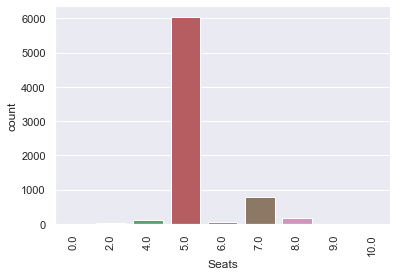

In [65]:
  sns.countplot(data=df, x='Seats');
  plt.xticks(rotation=90)
  plt.show();

#### Insights
1. 5 seats cars are most popular in market and 7 seats cars are second popula

### heatmap

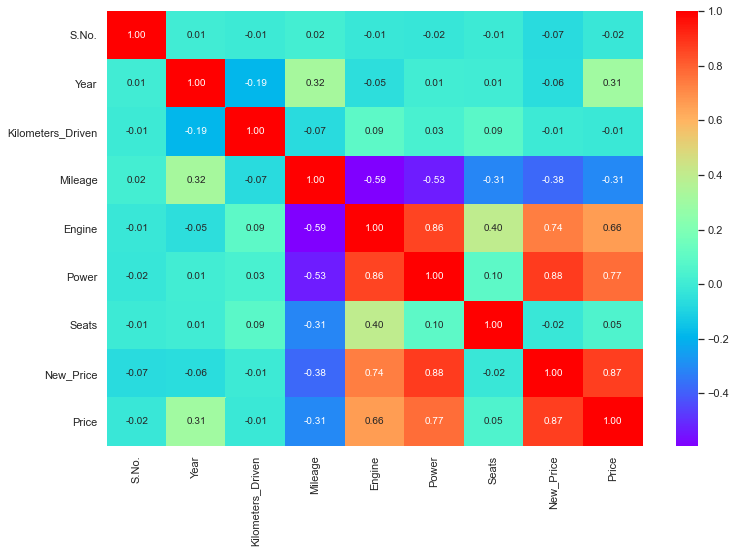

In [66]:
#correlation

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='rainbow', )
plt.show()

#### Insights
1. `Power` and `Engine` have strong co-relation so we have to further analyze if we should keep both or can drop one variable.
2. We can anyhow drop S.No as it is id and does not significantly contribute to the model.
3. `kilometers_Driven` does not show any strong correlation with any other variable so we can consider it as indenpendent variable but it also does not have stron correlation with price. So further analysis is required.

3. Corelation with `Price`: `Engine`, `Power`, `Seats` and `New_price` have strong correlation with target variable price so we can consider to keep them as independent variable.
4. `Mileage` and `Year` also have some co-relation with price but both have same but negative co-relation so we can further analysis if we should keep both of them in model as dependent variables or we can drop one.
 


### pairplot

In [67]:
df_new =df.drop(columns=['S.No.'],axis=1)

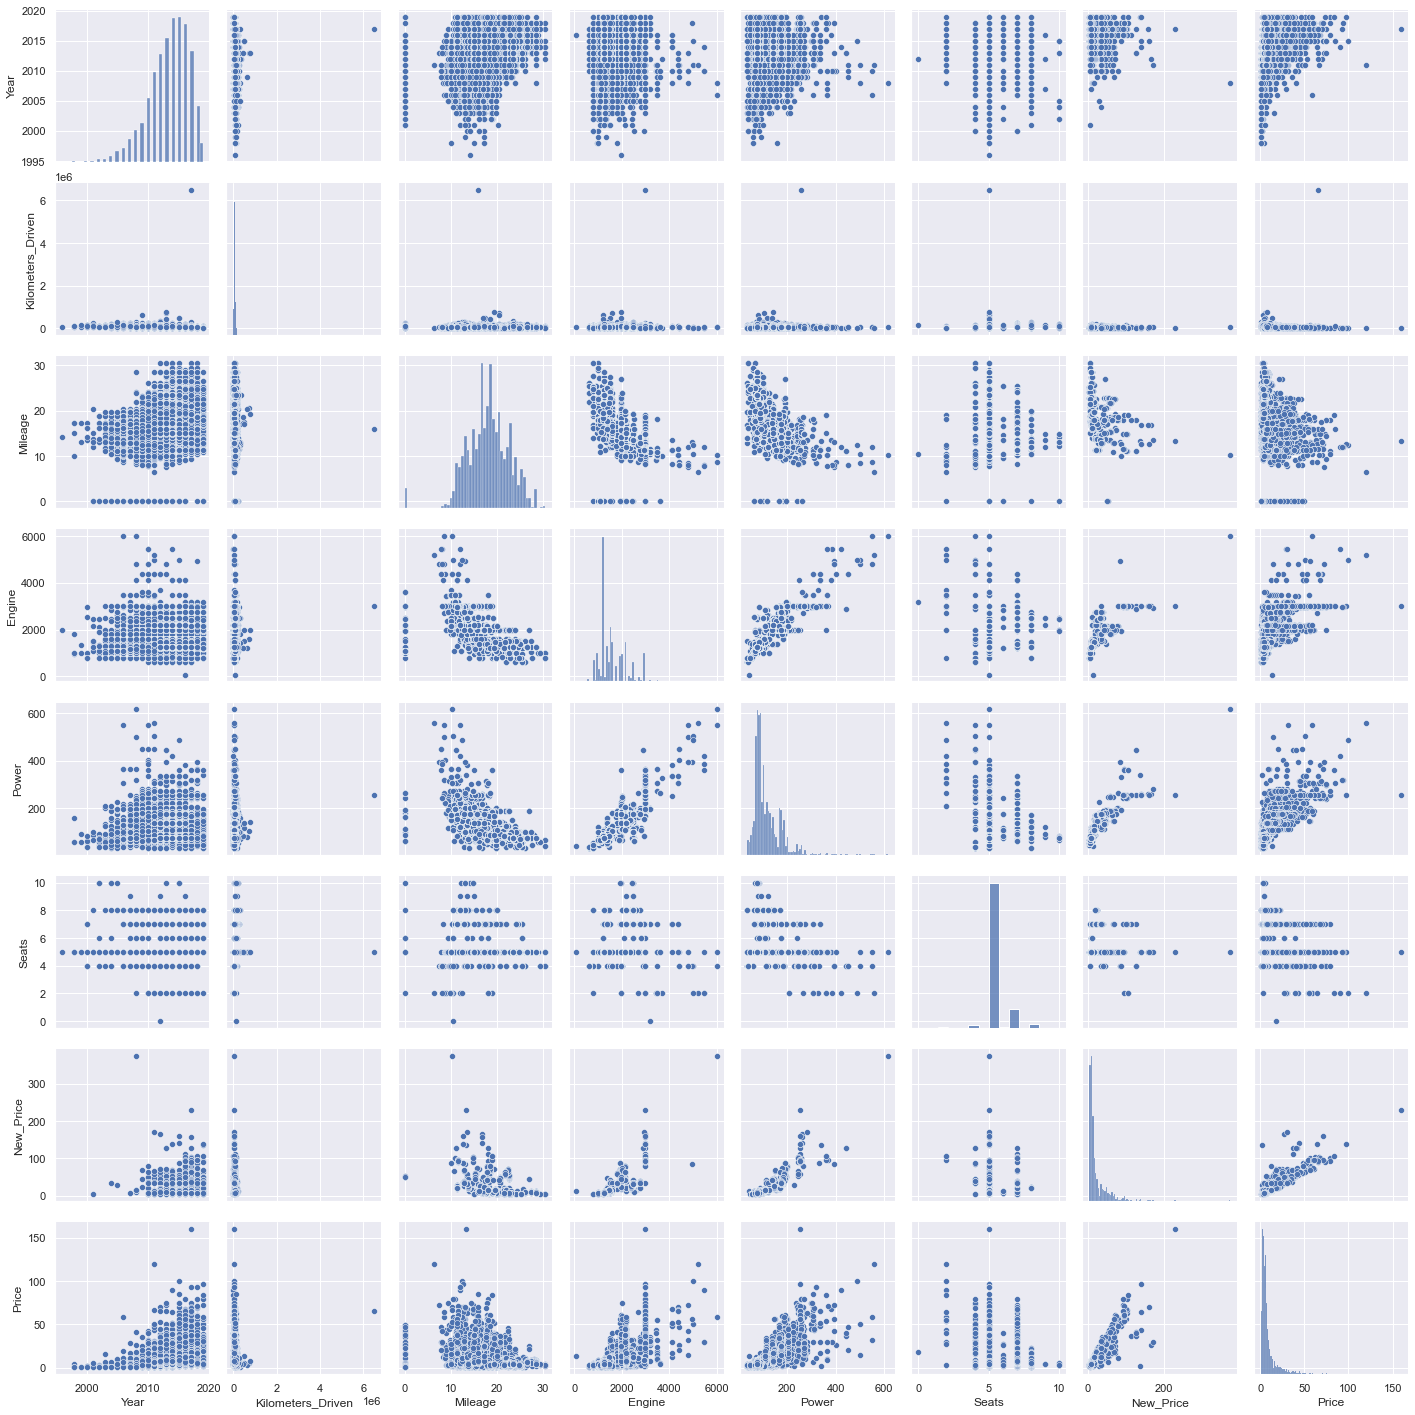

In [68]:
sns.pairplot(data=df_new);

#### Insights

1. `Engine` and `Power` has almost linear relationship so we can consider to drop on of the column for model.
2. `New_Price` has almost linear relationship with `Price` and does not seem to have strong linear relationship with anyother variable except some relationship with `Engine` and `Power`. we can consider it as independent variable. 
3. `Mileage` has some non linear relationship with power and engine.

#### BarPlot

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Jaipur'),
  Text(1, 0, 'Chennai'),
  Text(2, 0, 'Mumbai'),
  Text(3, 0, 'Hyderabad'),
  Text(4, 0, 'Bangalore'),
  Text(5, 0, 'Delhi'),
  Text(6, 0, 'Pune'),
  Text(7, 0, 'Kolkata'),
  Text(8, 0, 'Coimbatore'),
  Text(9, 0, 'Ahmedabad'),
  Text(10, 0, 'Kochi')])

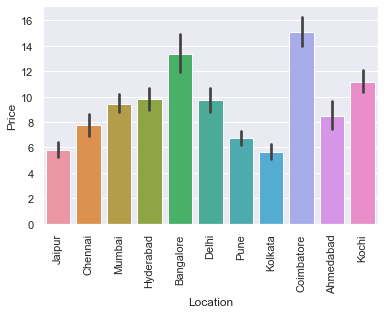

In [69]:
#plot between price and other inddpendent variable
sns.barplot(data=df, x='Location', y='Price');
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Jaipur'),
  Text(1, 0, 'Chennai'),
  Text(2, 0, 'Mumbai'),
  Text(3, 0, 'Hyderabad'),
  Text(4, 0, 'Bangalore'),
  Text(5, 0, 'Delhi'),
  Text(6, 0, 'Pune'),
  Text(7, 0, 'Kolkata'),
  Text(8, 0, 'Coimbatore'),
  Text(9, 0, 'Ahmedabad'),
  Text(10, 0, 'Kochi')])

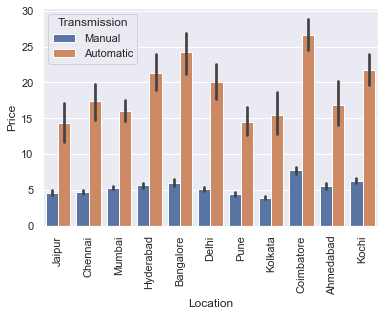

In [70]:
#plot between price and other inddpendent variable
sns.barplot(data=df, x='Location', y='Price',hue='Transmission');
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 [Text(0, 0, '1996'),
  Text(1, 0, '1998'),
  Text(2, 0, '1999'),
  Text(3, 0, '2000'),
  Text(4, 0, '2001'),
  Text(5, 0, '2002'),
  Text(6, 0, '2003'),
  Text(7, 0, '2004'),
  Text(8, 0, '2005'),
  Text(9, 0, '2006'),
  Text(10, 0, '2007'),
  Text(11, 0, '2008'),
  Text(12, 0, '2009'),
  Text(13, 0, '2010'),
  Text(14, 0, '2011'),
  Text(15, 0, '2012'),
  Text(16, 0, '2013'),
  Text(17, 0, '2014'),
  Text(18, 0, '2015'),
  Text(19, 0, '2016'),
  Text(20, 0, '2017'),
  Text(21, 0, '2018'),
  Text(22, 0, '2019')])

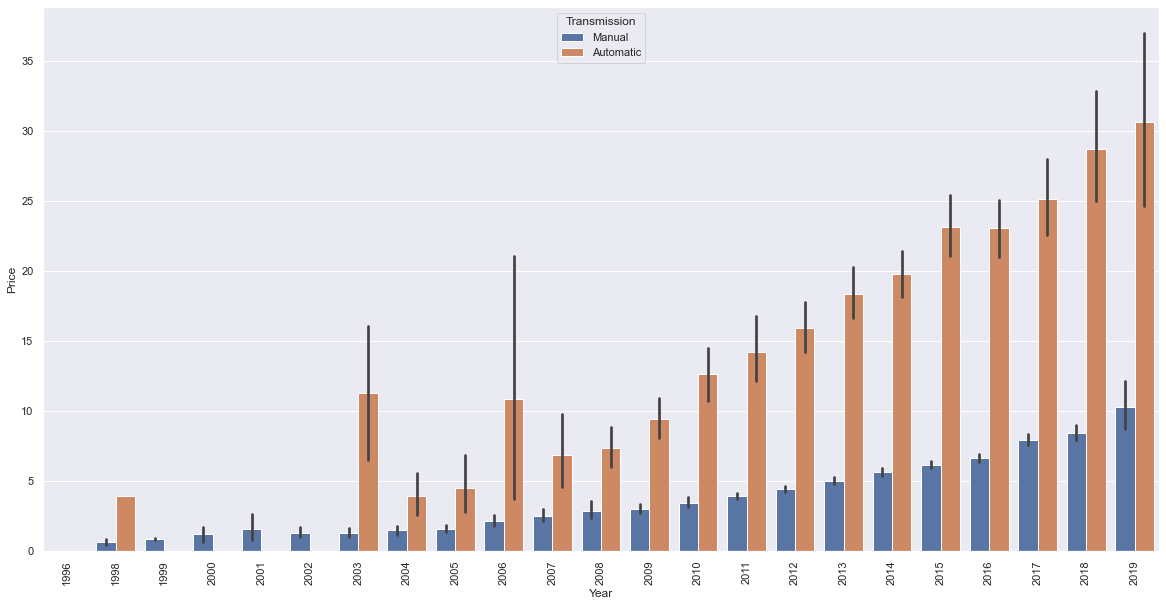

In [71]:
plt.figure(figsize=(20,10))
sns.barplot(data=df,x='Year',y='Price',hue='Transmission');
plt.xticks(rotation=90)

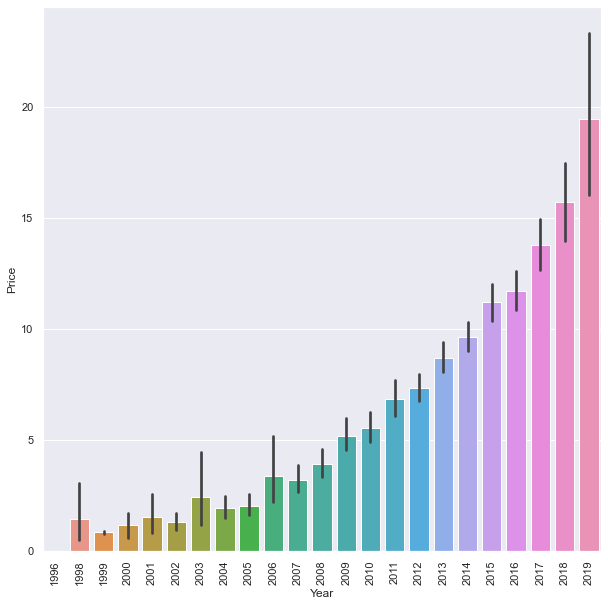

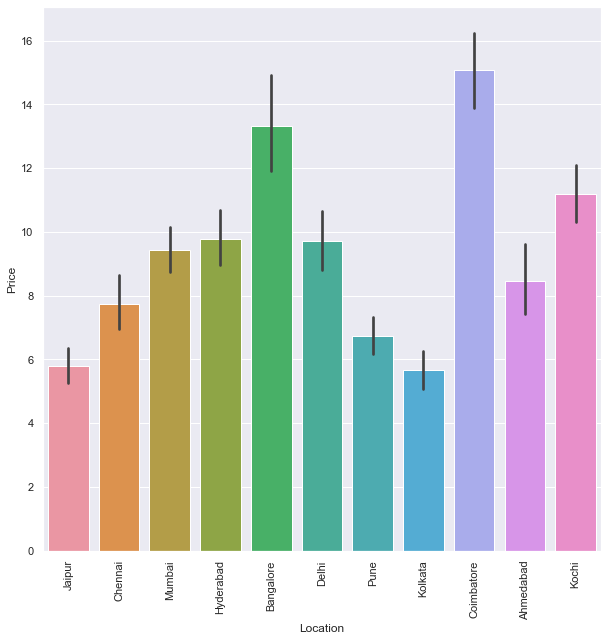

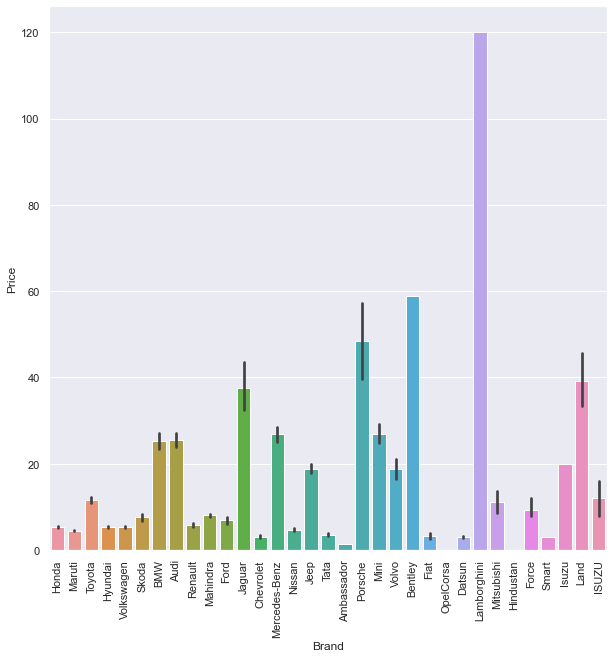

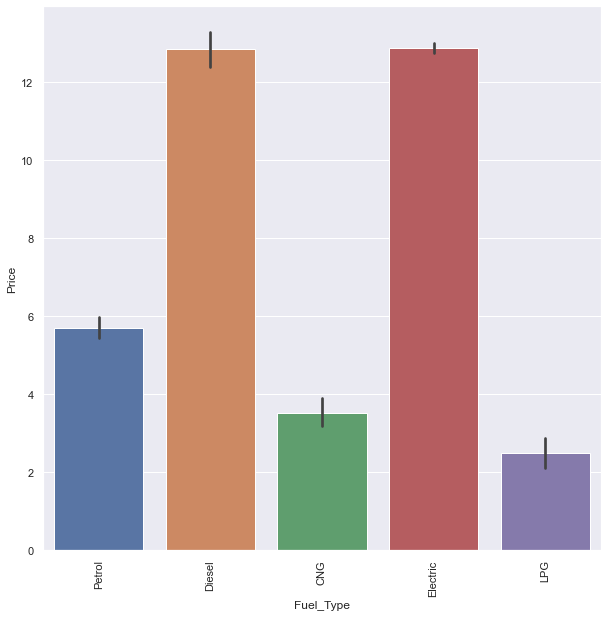

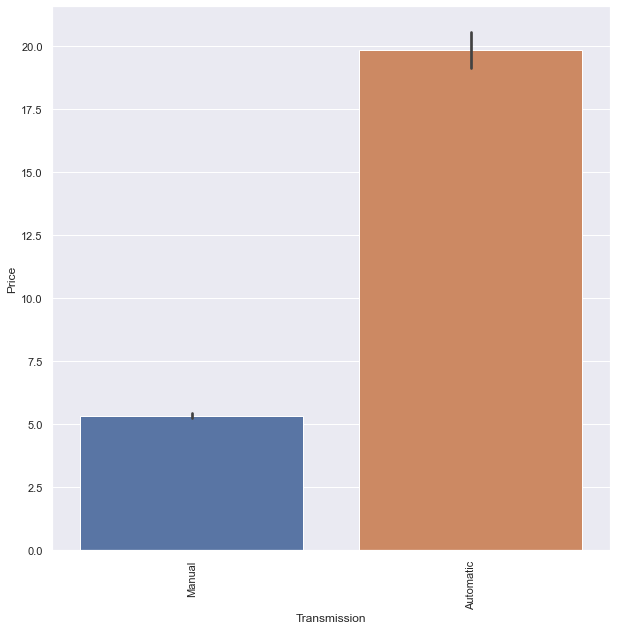

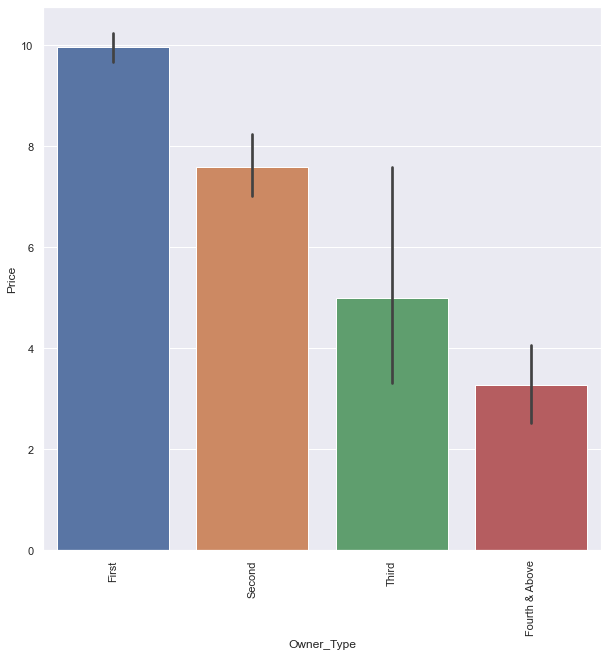

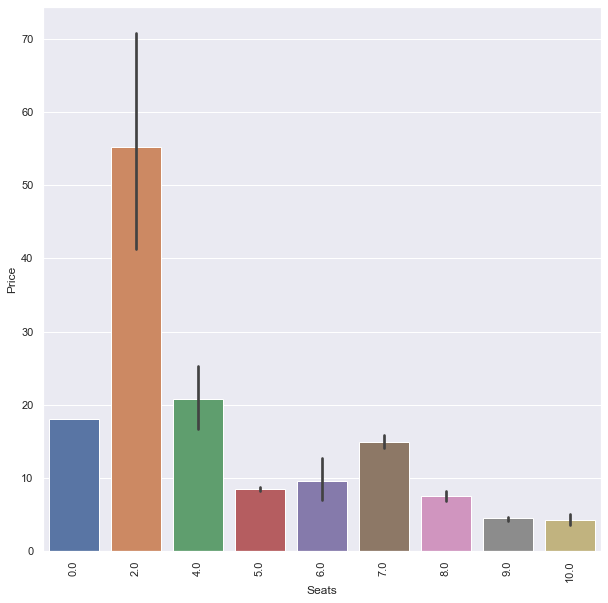

In [72]:
columns=['Year','Location','Brand','Fuel_Type','Transmission','Owner_Type','Seats']
#hue='Fuel_Type'
for col in columns:
    plt.figure(figsize=(10,10));
    sns.barplot(data=df,x=col,y='Price');
    plt.xticks(rotation=90)
    plt.show()

#### Insights
1. Old cars are sold at coimbatore at higher price aorund 24-29 lakhs.Automatic cars are more popular at almost all of the location.
2. There is a continuous increase in Old car's selling price and selling price of automatic cars since 2007.
3. Top 3 location where old cars are being sold at higher price, are coimbatore> Banglore> Kochi.
4. Top 3 brand being sold at highest price are Lamborghini> Bentley>Porsche
5. Price for Diesel and Electric cars is almost same and highest.
6. Price for Automatic cars is more than manual cars.
7. Price for First owner cars is more than other owner type.



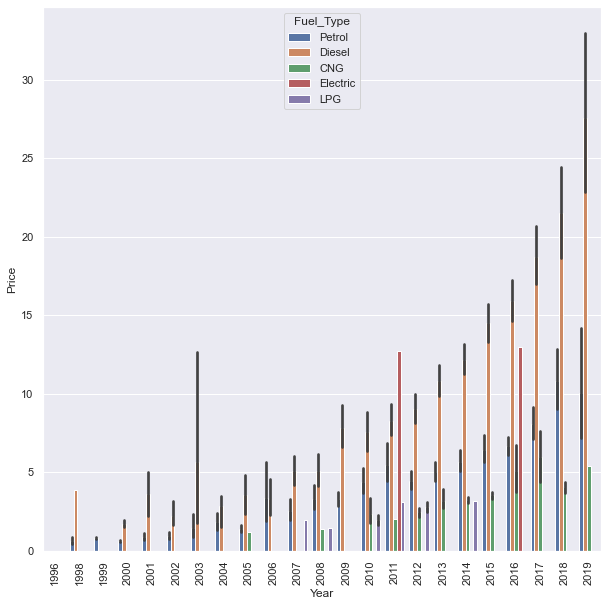

In [73]:
plt.figure(figsize=(10,10));
sns.barplot(data =df, x='Year',y='Price', hue='Fuel_Type');
plt.xticks(rotation=90)
plt.show()


#### Insights:
1. Price for Diesel car is constanlt increasing over the years.


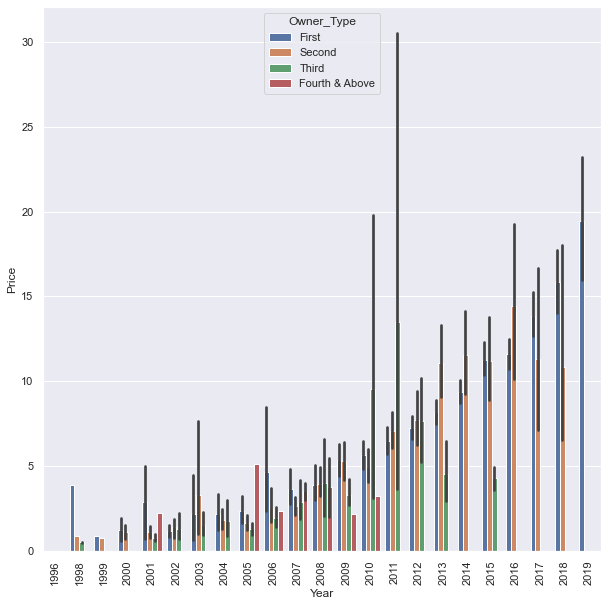

In [74]:
plt.figure(figsize=(10,10));
sns.barplot(data =df, x='Year',y='Price', hue='Owner_Type');
plt.xticks(rotation=90)
plt.show()

#### Insights
1. Price for car's owned by first owner over the years.

# 2. Illustrate the insights based on EDA

Insighs are already given above with each and every plot and analysis.

# 3.  Data Pre-processing

### 1. Outlier Treatment

#### Identifying extreme values in kilo meter driven


In [75]:
df[ df['Kilometers_Driven'] == df['Kilometers_Driven'].max()]

,Model_count,S.No.,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Brand
1582,model_1_5,2328,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,NaN,65.0,BMW


#### Identification of records having 0 values in mileage column

In [76]:
Mileage_0= df[ df['Mileage'] == 0]['Mileage'].count()
print(f"Total number of records with 0 mileage are " + str(Mileage_0) )

Total number of records with 0 mileage are 81


#### Outlier treatment of Kilometers_Driven and price column column ( Log Transformation)

Kilometers_Driven and Price features are very skewed and will likely behave better on the log scale.

I'll transform both `Kilometers_Driven` and `Price`.

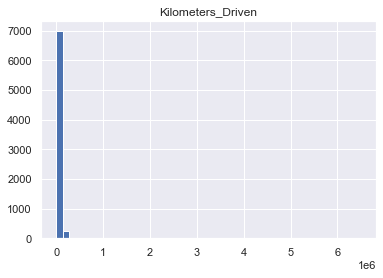

0


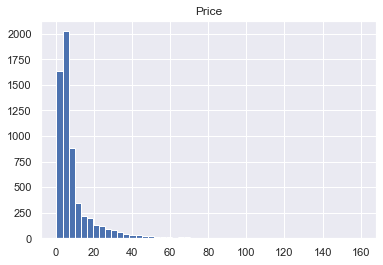

0


In [77]:
#histplot for `Kilometers_Driven` and `Price` before log transformation
cols_to_log = ['Kilometers_Driven', 'Price']
for colname in cols_to_log:
    plt.hist(df[colname], bins=50)
    plt.title(colname)
    plt.show()
    print(np.sum(df[colname] <= 0))

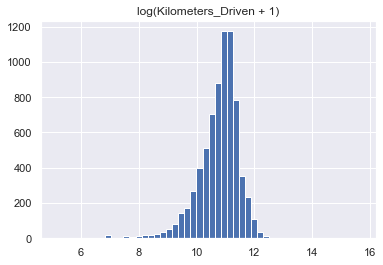

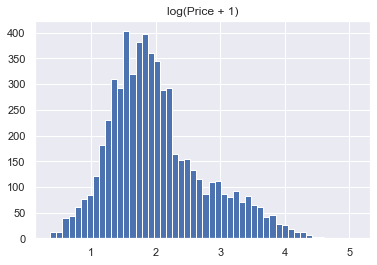

In [78]:
## Histplot after transformatyion
plt.hist(np.log(df['Kilometers_Driven'] + 1), 50)
plt.title('log(Kilometers_Driven + 1)')
plt.show()
plt.hist(np.log(df['Price'] + 1), 50)
plt.title('log(Price + 1)')
plt.show()

In [79]:
cols = ['Kilometers_Driven','Price']
for colname in cols_to_log:
    df[colname + '_log'] = np.log(df[colname] + 1)
df.drop(cols_to_log, axis=1, inplace=True)

#### outlier treatment for other columns

In [80]:
# Lets treat outliers by flooring and capping
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    Q1=df[col].quantile(0.25) # 25th quantile
    Q3=df[col].quantile(0.75)  # 75th quantile
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR 
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [81]:
numerical_col = ['Year','Mileage','Power','Engine','New_Price','Kilometers_Driven_log','Price_log']
df = treat_outliers_all(df,numerical_col)

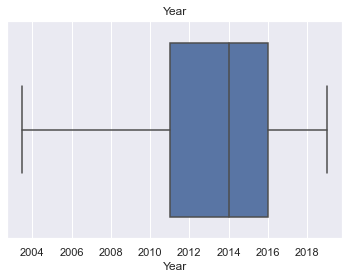

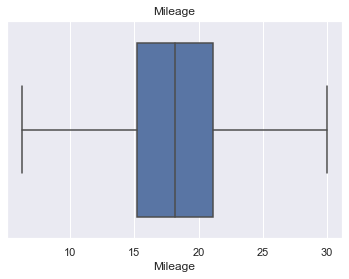

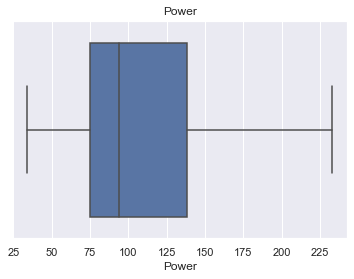

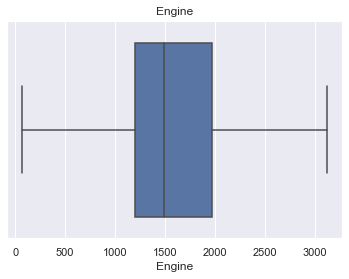

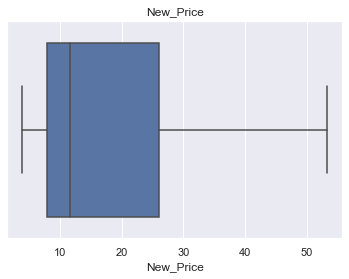

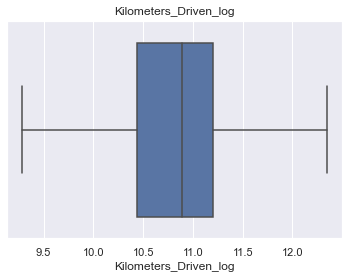

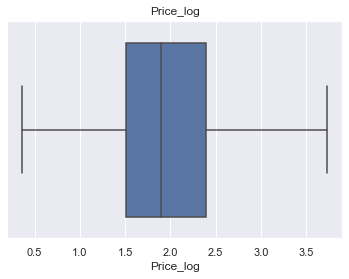

In [82]:
# lets look at box plot to see if outliers has been treated or not


numerical_col = ['Year','Mileage','Power','Engine','New_Price','Kilometers_Driven_log','Price_log']

for col in numerical_col:
    sns.boxplot(data=df,x=col);
    
    plt.title(col)          
    plt.show()

In [83]:
#chcking 0 Mileage count after outlier treatment
Mileage_0= df[ df['Mileage'] == 0]['Mileage'].count()
print(f"Total number of records with 0 mileage are " + str(Mileage_0) )

Total number of records with 0 mileage are 0


### 2. Missing values

There are lots of ways to handle missing values. 

I'm going to start by investigating the patterns in the missingness.

In [84]:
df.isnull().sum() # lots of columns don't have missingness

Model_count                 0
S.No.                       0
Location                    0
Year                        0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_Price                6247
Brand                       0
Kilometers_Driven_log       0
Price_log                1234
dtype: int64

The `Price_log` column has a lot of missing values.AS we are using price_log column as target varaible,there is no values to have null values in target column and we can drop them.

In [85]:
df.dropna(subset=['Price_log'], inplace=True)

In [86]:
df.isnull().sum()

Model_count                 0
S.No.                       0
Location                    0
Year                        0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     36
Power                     143
Seats                      42
New_Price                5195
Brand                       0
Kilometers_Driven_log       0
Price_log                   0
dtype: int64

In [87]:
# counting the number of missing values per row
df.isnull().sum(axis=1).value_counts()

1    5050
0     823
2     106
4      36
3       4
dtype: int64

#### Imputation of missing values of Mileage, Engine, Power, Seats


In [88]:
##checking of 0 value records for Mileage after outlier treatment
df[df['Mileage'] ==0]

,Model_count,S.No.,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand,Kilometers_Driven_log,Price_log


In [89]:
df[df['Mileage'].isna() ==True]

,Model_count,S.No.,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand,Kilometers_Driven_log,Price_log
1,model_1,4446,Chennai,2016.0,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,Mahindra,10.819798,2.639057
465,model_1,4904,Mumbai,2011.0,Electric,Automatic,First,NaN,1798.0,73.0,5.0,NaN,Toyota,10.691968,2.621039


In [90]:
####Mileage
print('missing value in Mileage column \t%s' %(df['Mileage'].isnull().sum()))
df['Mileage'] = df['Mileage'].fillna(df.groupby('Brand')['Mileage'].transform('median'))
print('missing value in Mileage column after imputation \t%s' %(df['Mileage'].isnull().sum()))


missing value in Mileage column 	2
missing value in Mileage column after imputation 	0


In [91]:
####Engine
print('missing value in Engine column \t%s' %(df['Engine'].isnull().sum()))
df['Engine'] = df['Engine'].fillna(df.groupby('Brand')['Engine'].transform('median'))
print('missing value in Engine column after imputation \t%s' %(df['Engine'].isnull().sum()))

missing value in Engine column 	36
missing value in Engine column after imputation 	0


In [92]:
####Seats
print('missing value in Seats column \t%s' %(df['Seats'].isnull().sum()))
df['Seats'] = df['Seats'].fillna(df.groupby('Brand')['Seats'].transform('median'))
print('missing value in Seats column after imputation \t%s' %(df['Seats'].isnull().sum()))

missing value in Seats column 	42
missing value in Seats column after imputation 	0


In [93]:
df[['Power','Brand']].groupby('Brand').median()

,Power
Brand,
Ambassador,35.500
Audi,174.330
BMW,190.000
Bentley,232.750
Chevrolet,79.400
Datsun,53.640
Fiat,91.200
Force,139.010
Ford,89.840


As `smart` brand have Nan value for median which is possible if there is no value for power column for this specific brand. so imputation strategy to impute median value group by brand will not work with `Power` column so we have to use somed other strategy. I will use mean imputation.

In [94]:
print('missing value in Power column \t%s' %(df['Power'].isnull().sum()))


df['Power'] = df['Power'].fillna(df['Power'].mean())
print('missing value in Power column after imputation \t%s' %(df['Power'].isnull().sum()))

missing value in Power column 	143
missing value in Power column after imputation 	0


#### Imputation of missing values in New_Price by mean after soing groupby on brand

In [95]:
df[['New_Price','Brand']].groupby('Brand').median()

,New_Price
Brand,
Ambassador,NaN
Audi,53.27875
BMW,53.27875
Bentley,NaN
Chevrolet,NaN
Datsun,4.05000
Fiat,9.50000
Force,NaN
Ford,11.27000


As`Ambassador`,`Lamborghini`,`ISUZU`,`Force`,`Chevrolet`,`Bentley`,`Ambassador`, `smart` brand have Nan value for median which is possible if there is no value for `New_Price` column for these specific brands. In this case, imputation strategy to impute median value group by brand will not work and have to use some other strategy. I will use mean imputation.

In [96]:
print('missing value in New_Price column \t%s' %(df['New_Price'].isnull().sum()))


df['New_Price'] = df['New_Price'].fillna(df['New_Price'].mean())
print('missing value in New_Price column after imputation \t%s' %(df['New_Price'].isnull().sum()))

missing value in New_Price column 	5195
missing value in New_Price column after imputation 	0


# 4. Model Building

In [97]:
df.head()

,Model_count,S.No.,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Brand,Kilometers_Driven_log,Price_log
0,model_31_40,281,Jaipur,2011.0,Petrol,Manual,First,17.0,1497.0,118.0,5.0,19.77554,Honda,10.915107,1.650580
1,model_31_40,387,Chennai,2011.0,Petrol,Manual,First,17.0,1497.0,118.0,5.0,19.77554,Honda,11.450869,1.558145
2,model_31_40,621,Mumbai,2009.0,Petrol,Manual,First,17.0,1497.0,118.0,5.0,19.77554,Honda,11.156265,1.131402
3,model_31_40,1049,Hyderabad,2012.0,Petrol,Manual,First,17.0,1497.0,118.0,5.0,19.77554,Honda,11.121896,1.832581
4,model_31_40,1212,Jaipur,2011.0,Petrol,Manual,First,17.0,1497.0,118.0,5.0,19.77554,Honda,10.859018,1.568616


As `Model` column will have the same impact as its `Brand`,so we can drop `Model` column along with S.No. alsoo Power and Engine column have very high corelation, we can drop one of them for our model.I am dropping `Engine`

In [98]:
df.drop(['S.No.','Engine'],axis=1, inplace=True)

In [99]:
df.columns

Index(['Model_count', 'Location', 'Year', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Power', 'Seats', 'New_Price', 'Brand',
       'Kilometers_Driven_log', 'Price_log'],
      dtype='object')

In [100]:
X = df.drop(['Price_log'], axis=1)
y = df['Price_log']

print(X.head())
print(y.head())

   Model_count   Location    Year Fuel_Type Transmission Owner_Type  Mileage  \
0  model_31_40     Jaipur  2011.0    Petrol       Manual      First     17.0   
1  model_31_40    Chennai  2011.0    Petrol       Manual      First     17.0   
2  model_31_40     Mumbai  2009.0    Petrol       Manual      First     17.0   
3  model_31_40  Hyderabad  2012.0    Petrol       Manual      First     17.0   
4  model_31_40     Jaipur  2011.0    Petrol       Manual      First     17.0   

   Power  Seats  New_Price  Brand  Kilometers_Driven_log  
0  118.0    5.0   19.77554  Honda              10.915107  
1  118.0    5.0   19.77554  Honda              11.450869  
2  118.0    5.0   19.77554  Honda              11.156265  
3  118.0    5.0   19.77554  Honda              11.121896  
4  118.0    5.0   19.77554  Honda              10.859018  
0    1.650580
1    1.558145
2    1.131402
3    1.832581
4    1.568616
Name: Price_log, dtype: float64


In [101]:
print(X.shape)
print(y.shape)

(6019, 12)
(6019,)


### 1. Create Dummy Variables

In [102]:
X = pd.get_dummies(X, columns=['Location', 'Brand','Fuel_Type','Transmission','Owner_Type','Model_count'], drop_first=True)
X.head()

,Year,Mileage,Power,Seats,New_Price,Kilometers_Driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_ISUZU,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Model_count_model_11_20,Model_count_model_1_5,Model_count_model_21_30,Model_count_model_31_40,Model_count_model_41_50,Model_count_model_51_60,Model_count_model_6_10
0,2011.0,17.0,118.0,5.0,19.77554,10.915107,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0
1,2011.0,17.0,118.0,5.0,19.77554,11.450869,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0
2,2009.0,17.0,118.0,5.0,19.77554,11.156265,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0
3,2012.0,17.0,118.0,5.0,19.77554,11.121896,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0
4,2011.0,17.0,118.0,5.0,19.77554,10.859018,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0


In [103]:
X.shape

(6019, 61)

In [104]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [105]:
X_train.head()

,Year,Mileage,Power,Seats,New_Price,Kilometers_Driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_ISUZU,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Model_count_model_11_20,Model_count_model_1_5,Model_count_model_21_30,Model_count_model_31_40,Model_count_model_41_50,Model_count_model_51_60,Model_count_model_6_10
1883,2016.0,12.51,187.70,7.0,19.77554,11.034906,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2096,2017.0,10.40,163.50,5.0,19.77554,10.126671,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
1380,2006.0,19.70,46.30,5.0,19.77554,11.184338,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0
1673,2014.0,23.00,90.00,5.0,19.77554,11.112463,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0
722,2017.0,13.22,232.75,5.0,19.77554,10.688028,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### 2. Choose Model, Train and Evaluate

In [106]:
#Fitting linear model
lin_reg_model = LinearRegression()                                    
lin_reg_model.fit(X_train, y_train)   

LinearRegression()

In [107]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(np.append(lin_reg_model.coef_.flatten(), lin_reg_model.intercept_), \
                       index=X_train.columns.tolist()+['Intercept'], columns=['Coefficients'])
print(coef_df)

                           Coefficients
Year                           0.095038
Mileage                       -0.014170
Power                          0.006466
Seats                          0.042689
New_Price                      0.001329
Kilometers_Driven_log         -0.073666
Location_Bangalore             0.122172
Location_Chennai               0.024780
Location_Coimbatore            0.074387
Location_Delhi                -0.056442
Location_Hyderabad             0.097635
Location_Jaipur               -0.035327
Location_Kochi                -0.023242
Location_Kolkata              -0.196043
Location_Mumbai               -0.044996
Location_Pune                 -0.030779
Brand_Audi                     0.209308
Brand_BMW                      0.155992
Brand_Bentley                  1.299302
Brand_Chevrolet               -0.532962
Brand_Datsun                  -0.637749
Brand_Fiat                    -0.497606
Brand_Force                   -0.203427
Brand_Ford                    -0.301447


**Lets look at model performances**

In [108]:
# MAPE
def mape(targets, predictions):
    return np.mean(np.abs((targets - predictions)) / targets) * 100

# Adjusted R^2
def adj_r2(ind_vars, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = ind_vars.shape[0]
    k = ind_vars.shape[1]
    return 1-((1-r2)*(n-1)/(n-k-1))

# Model performance check
def model_perf(model, inp, out):

    y_pred = model.predict(inp)
    y_act = out.values

    return pd.DataFrame({
                "RMSE": np.sqrt(mean_squared_error(y_act, y_pred)),
                "MAE": mean_absolute_error(y_act, y_pred),
                "MAPE": mape(y_act, y_pred),
                "R^2": r2_score(y_act, y_pred),
                "Adjusted R^2": adj_r2(inp, y_act, y_pred)
           }, index=[0])

In [109]:
print('Training Performance\n')
print(model_perf(lin_reg_model, X_train, y_train))

Training Performance

       RMSE       MAE      MAPE       R^2  Adjusted R^2
0  0.186935  0.143229  8.194838  0.935157      0.934204


In [110]:
# Checking model performance on test set
print('Test Performance\n')
print(model_perf(lin_reg_model, X_test, y_test))

Test Performance

       RMSE       MAE      MAPE       R^2  Adjusted R^2
0  0.210891  0.150227  8.524427  0.911931      0.908851


### 3. Conclusion

The training and testing RMSE are .18 and .21 respectively, and both scores are comparable. Hence, the model is a good fit.

R2_score is 0.911, that explains 91.1% of total variation in the dataset. So, overall the model is very satisfactory.
R2_score for test and train data is very close and difference is less than .03..

# 5. Testing Assumptions of the Linear Regression Model

1. **No Multicollinearity**
2. **Mean of residuals should be 0**
3. **No Heteroscedacity**
4. **Linearity of variables**
5. **Normality of error terms**

### 1. Let's check Multicollinearity using VIF scores

In [111]:
# to compute VIF, we first have to add a constant column having value 1 to our input variables

X1 = X.copy()
X1['const'] = 1
X1.head()

,Year,Mileage,Power,Seats,New_Price,Kilometers_Driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_ISUZU,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Model_count_model_11_20,Model_count_model_1_5,Model_count_model_21_30,Model_count_model_31_40,Model_count_model_41_50,Model_count_model_51_60,Model_count_model_6_10,const
0,2011.0,17.0,118.0,5.0,19.77554,10.915107,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
1,2011.0,17.0,118.0,5.0,19.77554,11.450869,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
2,2009.0,17.0,118.0,5.0,19.77554,11.156265,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
3,2012.0,17.0,118.0,5.0,19.77554,11.121896,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
4,2011.0,17.0,118.0,5.0,19.77554,10.859018,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1


In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series([variance_inflation_factor(X1.values,i) for i in range(X1.shape[1])],index=X1.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

Year                              2.350394
Mileage                           3.408432
Power                             4.871004
Seats                             2.386857
New_Price                         1.225512
Kilometers_Driven_log             1.953040
Location_Bangalore                2.491067
Location_Chennai                  3.013117
Location_Coimbatore               3.544900
Location_Delhi                    3.186807
Location_Hyderabad                3.838375
Location_Jaipur                   2.699797
Location_Kochi                    3.593654
Location_Kolkata                  3.163795
Location_Mumbai                   4.031209
Location_Pune                     3.451552
Brand_Audi                      232.217048
Brand_BMW                       261.597111
Brand_Bentley                     2.027410
Brand_Chevrolet                 121.282025
Brand_Datsun                     14.203364
Brand_Fiat                       29.255013
Brand_Force        

### Removing Multicollinearity

In [113]:
# Method to drop all the multicollinear columns and choose which one we should drop
def treating_multicollinearity(high_vif_columns, x_train, x_test, y_train, y_test):
    """
    Drop every column that has VIF score greater than 5, one by one.
    Look at the adjusted R square of all these models
    Look at the RMSE of all these models on test data
    """
    adj_rsq_scores = []
    rmse_test_data = []

    # build ols models by dropping one of these at a time and observe the Adjusted R-squared
    for cols in high_vif_columns:
        train = x_train.loc[:, ~x_train.columns.str.startswith(cols)]
        test = x_test.loc[:, ~x_test.columns.str.startswith(cols)]
        # Create the model
        
        model = LinearRegression(fit_intercept=False)
        model.fit(train, y_train)
        # Adj R-Sq
        adj_rsq_scores.append(adj_r2(train, y_train, model.predict(train)))
        # RMSE (Test data)
        y_pred_test_Price = model.predict(test)
        y_test_Price = y_test
        rmse_test_data.append(np.sqrt(mean_squared_error(y_pred_test_Price, y_test_Price)))

    # Add new Adj_Rsq and RMSE after dropping each colmn
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj_rsq_after_dropping_col": adj_rsq_scores,
            "Test RMSE": rmse_test_data,
        }
    ).sort_values(by="Adj_rsq_after_dropping_col", ascending=False)

    print(temp)

In [114]:
high_vif_columns = ["Brand_Audi","Brand_BMW","Brand_Chevrolet","Brand_Datsun","Brand_Fiat","Brand_Ford","Brand_Honda","Brand_Hyundai","Brand_Jaguar","Brand_Jeep","Brand_Land","Brand_Mahindra","Brand_Maruti",
                    "Brand_Mercedes-Benz","Brand_Mini","Brand_Mitsubishi","Brand_Nissan","Brand_Porsche","Brand_Renault","Brand_Skoda","Brand_Tata","Brand_Toyota","Brand_Volkswagen","Brand_Volvo",
                   "Fuel_Type_Diesel","Fuel_Type_Petrol"]

X_train1 = X_train.copy()
X_train1['constant'] = 1

X_test1 = X_test.copy()
X_test1['constant'] = 1

treating_multicollinearity(high_vif_columns, X_train1, X_test1, y_train, y_test)

                    col  Adj_rsq_after_dropping_col  Test RMSE
23          Brand_Volvo                    0.934204   0.210891
15     Brand_Mitsubishi                    0.934202   0.210884
21         Brand_Toyota                    0.934201   0.210879
9            Brand_Jeep                    0.934195   0.210872
1             Brand_BMW                    0.934193   0.210913
25     Fuel_Type_Petrol                    0.934188   0.210893
0            Brand_Audi                    0.934185   0.210911
19          Brand_Skoda                    0.934180   0.210878
13  Brand_Mercedes-Benz                    0.934179   0.210907
8          Brand_Jaguar                    0.934175   0.210933
6           Brand_Honda                    0.934173   0.210866
12         Brand_Maruti                    0.934171   0.210873
16         Brand_Nissan                    0.934167   0.210881
7         Brand_Hyundai                    0.934164   0.210875
5            Brand_Ford                    0.934164   0

In [115]:
X_train1.head()

,Year,Mileage,Power,Seats,New_Price,Kilometers_Driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_ISUZU,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Smart,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Model_count_model_11_20,Model_count_model_1_5,Model_count_model_21_30,Model_count_model_31_40,Model_count_model_41_50,Model_count_model_51_60,Model_count_model_6_10,constant
1883,2016.0,12.51,187.70,7.0,19.77554,11.034906,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2096,2017.0,10.40,163.50,5.0,19.77554,10.126671,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1
1380,2006.0,19.70,46.30,5.0,19.77554,11.184338,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1
1673,2014.0,23.00,90.00,5.0,19.77554,11.112463,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
722,2017.0,13.22,232.75,5.0,19.77554,10.688028,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [116]:
# dropping fuel_type may have impact on predicting price so lest drop some of brands.nd check multicolinearity
# check the vif again

X_train2 = X_train1.drop(columns =['Brand_Fiat','Brand_Mitsubishi'], axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))

Series before feature selection: 

Year                              2.413525
Mileage                           3.361595
Power                             4.924389
Seats                             2.406738
New_Price                         1.234576
Kilometers_Driven_log             1.968353
Location_Bangalore                2.536014
Location_Chennai                  3.074231
Location_Coimbatore               3.718153
Location_Delhi                    3.264238
Location_Hyderabad                3.927316
Location_Jaipur                   2.724448
Location_Kochi                    3.658464
Location_Kolkata                  3.214087
Location_Mumbai                   4.156252
Location_Pune                     3.448129
Brand_Audi                        5.243577
Brand_BMW                         6.019376
Brand_Bentley                     1.036326
Brand_Chevrolet                   2.838923
Brand_Datsun                      1.183144
Brand_Force                       1.077285
Brand_Ford         

#####  fuel still have the same VIF 

In [117]:
high_vif_columns = [ "Fuel_Type_Diesel","Fuel_Type_Petrol","Brand_Audi","Brand_BMW","Brand_Ford","Brand_Honda","Brand_Hyundai","Brand_Mahindra","Brand_Maruti",
                    "Brand_Mercedes-Benz","Brand_Toyota","Brand_Volkswagen"]

treating_multicollinearity(high_vif_columns, X_train1, X_test1, y_train, y_test)

                    col  Adj_rsq_after_dropping_col  Test RMSE
10         Brand_Toyota                    0.934201   0.210879
3             Brand_BMW                    0.934193   0.210913
1      Fuel_Type_Petrol                    0.934188   0.210893
2            Brand_Audi                    0.934185   0.210911
9   Brand_Mercedes-Benz                    0.934179   0.210907
5           Brand_Honda                    0.934173   0.210866
8          Brand_Maruti                    0.934171   0.210873
6         Brand_Hyundai                    0.934164   0.210875
4            Brand_Ford                    0.934164   0.210890
11     Brand_Volkswagen                    0.934163   0.210881
7        Brand_Mahindra                    0.934132   0.210857
0      Fuel_Type_Diesel                    0.933495   0.211827


In [118]:
# We'll drop Fuel_Type_Petrol and check the vif again
X_train3 = X_train2.drop(columns=['Fuel_Type_Petrol'], axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train3.values,i) for i in range(X_train3.shape[1])],index=X_train3.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))


Series before feature selection: 

Year                              2.411893
Mileage                           3.309190
Power                             4.922739
Seats                             2.402811
New_Price                         1.234479
Kilometers_Driven_log             1.956803
Location_Bangalore                2.534820
Location_Chennai                  3.072512
Location_Coimbatore               3.713954
Location_Delhi                    3.264105
Location_Hyderabad                3.925224
Location_Jaipur                   2.720638
Location_Kochi                    3.657143
Location_Kolkata                  3.210877
Location_Mumbai                   4.155813
Location_Pune                     3.447802
Brand_Audi                        5.242819
Brand_BMW                         6.019334
Brand_Bentley                     1.036312
Brand_Chevrolet                   2.838234
Brand_Datsun                      1.182853
Brand_Force                       1.077284
Brand_Ford         

In [119]:
high_vif_columns = ["Brand_Audi","Brand_BMW","Brand_Ford","Brand_Honda","Brand_Hyundai","Brand_Mahindra","Brand_Maruti",
                    "Brand_Mercedes-Benz","Brand_Toyota","Brand_Volkswagen"]
treating_multicollinearity(high_vif_columns, X_train1, X_test1, y_train, y_test)

                   col  Adj_rsq_after_dropping_col  Test RMSE
8         Brand_Toyota                    0.934201   0.210879
1            Brand_BMW                    0.934193   0.210913
0           Brand_Audi                    0.934185   0.210911
7  Brand_Mercedes-Benz                    0.934179   0.210907
3          Brand_Honda                    0.934173   0.210866
6         Brand_Maruti                    0.934171   0.210873
4        Brand_Hyundai                    0.934164   0.210875
2           Brand_Ford                    0.934164   0.210890
9     Brand_Volkswagen                    0.934163   0.210881
5       Brand_Mahindra                    0.934132   0.210857


In [120]:
##As RMSE is higher for "Brand_Smart","Brand_Bentley" so let try to drop then and check VIF again
X_train4 = X_train3.drop(columns=['Brand_Smart','Brand_Bentley'], axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train4.values,i) for i in range(X_train4.shape[1])],index=X_train4.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))


Series before feature selection: 

Year                              2.407183
Mileage                           3.282147
Power                             4.888067
Seats                             2.363466
New_Price                         1.234201
Kilometers_Driven_log             1.956003
Location_Bangalore                2.534753
Location_Chennai                  3.072466
Location_Coimbatore               3.713949
Location_Delhi                    3.264053
Location_Hyderabad                3.923814
Location_Jaipur                   2.720566
Location_Kochi                    3.657138
Location_Kolkata                  3.210750
Location_Mumbai                   4.155613
Location_Pune                     3.445881
Brand_Audi                        5.044474
Brand_BMW                         5.785808
Brand_Chevrolet                   2.769726
Brand_Datsun                      1.177905
Brand_Force                       1.075361
Brand_Ford                        5.233835
Brand_Honda        

In [121]:
#### VIF of the same branches is still high, lets try to drop maruti and check again
X_train5 = X_train4.drop(columns=['Brand_Maruti'], axis=1)
vif_series2 = pd.Series([variance_inflation_factor(X_train5.values,i) for i in range(X_train5.shape[1])],index=X_train5.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series2))


Series before feature selection: 

Year                              2.407032
Mileage                           3.176960
Power                             4.883853
Seats                             2.352129
New_Price                         1.230787
Kilometers_Driven_log             1.955929
Location_Bangalore                2.534012
Location_Chennai                  3.070832
Location_Coimbatore               3.711367
Location_Delhi                    3.262829
Location_Hyderabad                3.923388
Location_Jaipur                   2.719825
Location_Kochi                    3.654965
Location_Kolkata                  3.209757
Location_Mumbai                   4.154777
Location_Pune                     3.444679
Brand_Audi                        2.019052
Brand_BMW                         2.340792
Brand_Chevrolet                   1.114773
Brand_Datsun                      1.020466
Brand_Force                       1.017721
Brand_Ford                        1.302686
Brand_Honda        

That seemed to have helped - VIF has come down to quite a good limit and we can say that there is no multicollinearity.

In [122]:
lin_reg_model1 = LinearRegression(fit_intercept=False)
lin_reg_model1.fit(X_train5,y_train)

print('Training Performance\n')
print(model_perf(lin_reg_model1, X_train5, y_train))

Training Performance

       RMSE       MAE      MAPE       R^2  Adjusted R^2
0  0.189849  0.144093  8.261825  0.933119      0.932218


### Observations

* Earlier R-squared was 0.9351, now it is reduced to 0.0.9119 - this seems quite good!
* Now Adjusted R-squared is 0.932, Our model is able to explain 93.22% of variance that shows model is good.
* The Adjusted-R squared in initial model (lin_reg_model) it was 93.42% (Where we considered all the variables) this shows that the variables we dropped were not affecting the model much. 

### 2. MEAN OF RESIDUALS SHOULD BE 0

In [123]:
# predicted values
fitted = lin_reg_model1.predict(X_train5)
residual = fitted - y_train.values

np.mean(residual)

-6.598849430593732e-13

Mean of redisuals is very close to 0.

### 3. TEST FOR LINEARITY 

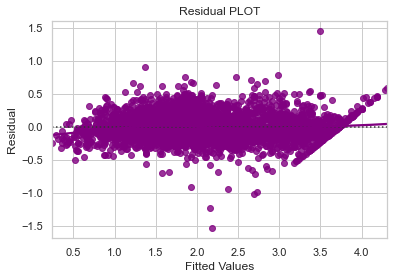

In [124]:
sns.set_style("whitegrid")
sns.residplot(fitted,residual,color="purple",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

Scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values) - If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn’t capture non-linear effects.
No pattern in residual plot, hence assumption is satisfied.

### 4. TEST FOR HOMOSCEDASTICITY

AS per the definition of  Homoscedacity - If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.
as in residual plot, residuals are symetrically distributed. Hence, this assumption is satisfied**


### 5. TEST FOR NORMALITY

Normality test caan be done by distribution of residuals and QQ plot. 
QQ plot: Residuals following normal distribution will make a straight line plot otherwise not.

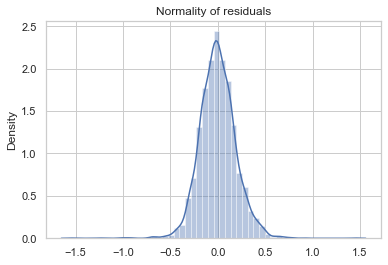

In [125]:
sns.distplot(residual)
plt.title('Normality of residuals')
plt.show()

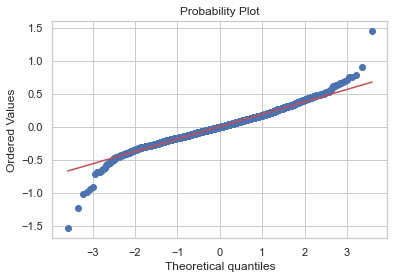

In [126]:
## QQ pplot
import pylab
import scipy.stats as stats
stats.probplot(residual.flatten(),dist="norm",plot=pylab)
plt.show()

*As per QQ plot they are approximately normal. So, this assumption is also satisfied.**

**Now we have checked all the assumptions and they are satisfied, so we can move towards prediction part**

## 6. Model performance Evaluation

In [127]:
X_train5.columns

Index(['Year', 'Mileage', 'Power', 'Seats', 'New_Price',
       'Kilometers_Driven_log', 'Location_Bangalore', 'Location_Chennai',
       'Location_Coimbatore', 'Location_Delhi', 'Location_Hyderabad',
       'Location_Jaipur', 'Location_Kochi', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Brand_Audi', 'Brand_BMW',
       'Brand_Chevrolet', 'Brand_Datsun', 'Brand_Force', 'Brand_Ford',
       'Brand_Honda', 'Brand_Hyundai', 'Brand_ISUZU', 'Brand_Isuzu',
       'Brand_Jaguar', 'Brand_Jeep', 'Brand_Lamborghini', 'Brand_Land',
       'Brand_Mahindra', 'Brand_Mercedes-Benz', 'Brand_Mini', 'Brand_Nissan',
       'Brand_Porsche', 'Brand_Renault', 'Brand_Skoda', 'Brand_Tata',
       'Brand_Toyota', 'Brand_Volkswagen', 'Brand_Volvo', 'Fuel_Type_Diesel',
       'Fuel_Type_Electric', 'Fuel_Type_LPG', 'Transmission_Manual',
       'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third',
       'Model_count_model_11_20', 'Model_count_model_1_5',
       'Model_count_mo

**Selecting columns from test data that we used to create our final model**

In [128]:
# first we add the constant to test input variables
X_test['constant'] = 1

X_test_final = X_test[X_train5.columns]

In [129]:
X_test_final.head()

,Year,Mileage,Power,Seats,New_Price,Kilometers_Driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Datsun,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_ISUZU,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Lamborghini,Brand_Land,Brand_Mahindra,Brand_Mercedes-Benz,Brand_Mini,Brand_Nissan,Brand_Porsche,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Model_count_model_11_20,Model_count_model_1_5,Model_count_model_21_30,Model_count_model_31_40,Model_count_model_41_50,Model_count_model_51_60,Model_count_model_6_10,constant
268,2016.0,22.70,118.00,5.0,19.77554,10.545368,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1
33,2012.0,22.90,74.00,5.0,19.77554,11.460252,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1
1360,2017.0,18.88,110.40,5.0,19.77554,9.288020,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
1819,2018.0,13.22,232.75,5.0,19.77554,10.388903,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
169,2012.0,22.30,74.00,5.0,19.77554,11.608245,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [130]:
y_pred = lin_reg_model1.predict(X_test_final)

**1. Checking the performance Metrics on train and test**:
This will cover 2 highlights:
1. Metrics (MAE, R2, RMSE)
2. performace on train and test data

In [131]:
print('Training Performance\n')
print(model_perf(lin_reg_model1, X_train5, y_train))

Training Performance

       RMSE       MAE      MAPE       R^2  Adjusted R^2
0  0.189849  0.144093  8.261825  0.933119      0.932218


In [132]:
print('Test Performance\n')
print(model_perf(lin_reg_model1, X_test_final, y_test))

Test Performance

       RMSE       MAE      MAPE       R^2  Adjusted R^2
0  0.211961  0.151152  8.597326  0.911035      0.908186


#### 2. Comment on performance measures and further improvements requirements
1. Now we can finally see that we have low test and train error, also both the errors are comparable, so our model is not suffering from overfitting.
2. Hence we can conclude the model "lin_reg_model1" is good for prediction as well as inference purpose.

## 7. Actionable insights and Recommendations

### Check Coefficients and intercept of model 

In [133]:
lin_reg_model1 = LinearRegression(fit_intercept=False)
lin_reg_model1.fit(X_train5,y_train)

# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(lin_reg_model1.coef_.flatten(), \
                       index=X_train5.columns.tolist(), columns=['Coefficients'])
print(coef_df)



                           Coefficients
Year                           0.094494
Mileage                       -0.014367
Power                          0.006579
Seats                          0.043242
New_Price                      0.001397
Kilometers_Driven_log         -0.075353
Location_Bangalore             0.123471
Location_Chennai               0.025375
Location_Coimbatore            0.072497
Location_Delhi                -0.055660
Location_Hyderabad             0.100332
Location_Jaipur               -0.038028
Location_Kochi                -0.022954
Location_Kolkata              -0.198908
Location_Mumbai               -0.045973
Location_Pune                 -0.031405
Brand_Audi                     0.465708
Brand_BMW                      0.411561
Brand_Chevrolet               -0.263743
Brand_Datsun                  -0.362394
Brand_Force                    0.062048
Brand_Ford                    -0.032477
Brand_Honda                    0.001806
Brand_Hyundai                 -0.031155


### Observations
Now this is our final model which follows all the assumptions and this can be used for interpretations

1. Kilometers_Driven come out to be very signifcant, as expected. As it increases, the price of old car decreases, as visible in the negative coefficient sign.  
2. Car with fuel type Electric has very significant impact on price. So if car is Electric, it will be sold at high price in market. Fuel type "Diesel" has positive cofficient and tends to be sold at higher price but not higher like electric cars. LPG cars has negative coffiecient which means it tends to be sold at less price.
3.  Transimission type "manual" has negative cofficient which means manual transmission tends to reduction in price of old car.
4. Second, third, fourth and above owner types tend to decrease in car price but as it comes to first owner type, car price will increase.
5. Seats counts tends to increase the price. So higher count ofv seats tends to increase the price of car.
6. Manufacturing year also has + cofficient which mean that newer car tends to be sold at higher price in market.

### Concluding Statement:

As conclusion, We can say that pricing model for Car4U is driven by some following major factors:
1. `Kilometer_driven` - Pricing will reduce with increase in kilo meteer drive.
2. `Fuel Type` - Pricing will be high for electrical car and some what for Diesel car than petrol car. Pricing will be minimum for LPG car.
3. `Transmission Type` - Pricing will be high for automatic car than manual car.
4. `Owner Type` - Pricing will be highest for first owner car among all other type for this  variable.
5. `Seat Count` - Higher the seat count, higher the price of car.
6. `Manufacturing Year` - newer the car, higher the price.
7. `Location` - some location (Hyderabad, Banglore) also has good positive coef which say car price at there locations is higher and some locations(e.g. Kolkata) has negative coef which mean that same car price will be lesser there.
8. `Brand` - some brands (e.g. Lamborghini , Porsche) has very high coef (1) which say that these brands is contributing very high in price and will be sold at very high price.
9. `Model` - Some models (based on popularity) have good coef  and positively contributing in determining the price.

In [134]:
# model performance
print('\n\nTraining Performance\n')
print(model_perf(lin_reg_model1, X_train5, y_train))



Training Performance

       RMSE       MAE      MAPE       R^2  Adjusted R^2
0  0.189849  0.144093  8.261825  0.933119      0.932218


In [135]:
print('Test Performance\n')
print(model_perf(lin_reg_model1, X_test_final, y_test))

Test Performance

       RMSE       MAE      MAPE       R^2  Adjusted R^2
0  0.211961  0.151152  8.597326  0.911035      0.908186


In [136]:
#Analysis of actual and predicted price of test set
# predicted values
fitted = lin_reg_model1.predict(X_test_final)
residual = fitted - y_test.values

np.mean(residual)

-0.010250124664574766

#### Insights
1. residual value for test data is close to 0. Although this value is larger than residual values for train data but still close to zero.